# Homework 3

##### TEAM F
Chouliarias Andreas 2143

Matzoros Christos-Konstantinos 2169

Pappas Apostolos 2109

## Exercise 1: Mathematical Preliminaries

#####  For the needs of (a), we have:

$$log(f(x)) = $$

$$log(\frac{1}{Z}e^{ax^2 + bx + c}) = $$

$$log(\frac{1}{Z}) + log(e^{ax^2 + bx + c}) = $$

$$-log(Z) + ax^2 + bx + c = $$

$$ ax^2 + bx + c - log(Z) $$

$$ ax^2 + bx + C = $$

, where $C = c - log(Z)$

To find the extremas of $log(f(x))$, we firstly take its derivative: 

$$[log(f(x))]^{'} = $$

$$ [ax^2 + bx + C]^{'} = $$

$$ 2ax + b$$

Then, we set the derivative equal to zero and solve for $x$:

$$ 2ax + b = 0 =>$$

$$ x = -\frac{b}{2a} =>$$

It is important to notice that there is only one extreme point. <br>
To find the curvature of $log(f(x))$, we examine its second derivative with respect to x:

$$[log(f(x))]^{''} = $$

$$ (2ax + b)^{'} = $$

$$ 2a $$

Knowing that $a < 0$, we see that the curvature is negative. That leads us to the conclusion that:

$$log(f(-\frac{b}{2a})) = $$

$$log(\frac{1}{Z}e^{a\frac{b^2}{4a^2} - b\frac{b}{2a} + c}) = $$

$$log(\frac{1}{Z}e^{\frac{b^2}{4a} - \frac{b^2}{2a} + c}) = $$

$$log(\frac{1}{Z})  + \frac{b^2}{4a} - \frac{b^2}{2a} + c = $$

$$ \frac{b^2}{4a} - \frac{b^2}{2a} + c - log(Z)= $$

$$ -\frac{b^2}{4a} + c - log(Z) = $$

$$ -\frac{b^2}{4a} + C = $$

, where $C = c - log(Z)$, is the only maximum.

##### For (b), we have:

$$ f(x) = g(x) =>$$

$$ \frac{1}{Z}e^{ax^2 + bx + c} = \frac{1}{\sqrt{2πσ^2} }e^{-\frac{1}{2}(\frac{x - μ}{σ})^2} =>$$

In order for this equation to be true, we have:

$$ \frac{1}{Z} = -\frac{1}{2}$$

$$ ax^2 + bx + c = -\frac{1}{2}(\frac{x - μ}{σ})^2 $$

Taking the second equation, we get:

$$ ax^2 + bx + c = -\frac{1}{2}\frac{x^2 - 2xμ + μ^2}{σ^2} =>$$

$$ 2σ^2ax^2 + 2σ^2bx + σ^2c = -x^2 + 2xμ - μ^2 =>$$

Then,

$$2σ^2a = -1 => σ^2 = -\frac{1}{2a} => σ = \sqrt{-\frac{1}{2a}}$$ , 

$$2σ^2b = 2μ => 2μ = 2σ^2b => 2μ = -2\frac{1}{2a}b => μ = -\frac{1}{2a}b $$

Finally, as we see, we can express μ and σ in terms of a, b and c as $μ = -\frac{1}{2a}b $ and $σ = \sqrt{-\frac{1}{2a}}$.

## Exercise 2: Linear Regression


##### For (a), we have:

##### For (b), we have:

We import the necessary data into respective variables.<br>
We then drop the first columns because it has ones for the bias and we don't need it yet

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

xTest = pd.read_csv('hw3xTest.csv',header=None)
xTrain = pd.read_csv('hw3xTrain.csv',header=None)
xValidation = pd.read_csv('hw3xValidation.csv',header=None)

yTest = pd.read_csv('hw3yTest.csv',header=None)
yTrain = pd.read_csv('hw3yTrain.csv',header=None)
yValidation = pd.read_csv('hw3yValidation.csv',header=None)


xTest = xTest.drop(xTest.columns[0], axis=1)
xTrain = xTrain.drop(xTrain.columns[0], axis=1)
xValidation = xValidation.drop(xValidation.columns[0], axis=1)

This the part that displays the omega_o values for lambda=0 <br>


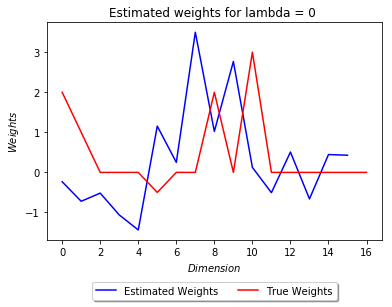

In [35]:
def  lambda_0(xTest,xTrain,xValidation,yTest,yTrain,yValidation):
    omega_true=np.array([2, 1,0,0,0,-0.5,0,0,2,0,3,0,0,0,0,0,0])
    
    M = len(omega_true)
    
    lambdas=np.array([0])
    
    xxtop = (xTrain.T).dot(xTrain)
    xtopy = (xTrain.T).dot(yTrain)
    
    omega_o = np.linalg.solve(xxtop, xtopy)  # omega_o = (x'x)^-1 * x'y
    #omega_o = np.linalg.inv(xxtop.T.dot(xxtop)).dot(xxtop.T).dot(xtopy)
    
    fig = plt.figure()
    ax = plt.subplot(111)
    ax.plot(omega_o, "b-",label =  'Estimated Weights')
    ax.plot(omega_true, "r-",label='True Weights')
    plt.xlabel(r'$Dimension$')
    plt.ylabel(r'$Weights$')
    plt.title(r'Estimated weights for lambda = 0 ')
    ax.legend(loc='upper center',bbox_to_anchor=(0.5, -0.17),shadow=True, ncol=2)
    plt.show()
    return

lambda_0(xTest,xTrain,xValidation,yTest,yTrain,yValidation)

The plot above compares the weights we found with training, with the right ones.<br>

##### For (c), we have:

The part below implements the model and it trains it for every lambda value

It makes a plot that shows how the least-squares errors of our model on the training and the test set
changes as a function of lambda.


In [36]:
def  many_lambdas(xTest,xTrain,xValidation,yTest,yTrain,yValidation):    
    lambdas=[1,5,10,25,50,75,100,250,500,750,1000]
    
    xxtop = (xTrain.T).dot(xTrain)
    xtopy = (xTrain.T).dot(yTrain)
    
    omega = []   
    errorTrain = []   
    errorTest = []   
    errorTest = []   
    errorValidation = []   
    
    for k in range( len(lambdas)):
        omega.append( np.linalg.solve((xxtop + lambdas[k] * np.eye( len(xxtop))) , xtopy) )     #omega(k) = (x'x + λI)^-1 *x'y
        ypredTrain     = (omega[k].T.dot(xTrain.T)).T                                            #ypredTrain = (w * x')'
        ypredTest      = (omega[k].T.dot(xTest.T )).T                                            #ypredTest  = (w*x')'
        ypredValidation= (omega[k].T.dot(xValidation.T )).T                                      #ypredValidation = = (w*x')'
        errorTrain.append(   np.mean( (ypredTrain -yTrain )**2 ).T )
        errorTest.append(    np.mean((ypredTest -yTest )**2 ).T )
        errorValidation.append( np.mean((ypredValidation-yValidation)**2).T )
        
    fig = plt.figure()
    ax = plt.subplot(111)    
    ax.set_xscale('log')
    ax.plot(lambdas, errorTrain, "b-",label ='Train')
    ax.plot(lambdas, errorTest,  "r-",label ='Test')
    ax.plot(lambdas, errorValidation,  "g-",label ='Validation')
    plt.xlabel(r'$Lambda$')
    plt.ylabel(r'$MSE$')
    plt.title(r'MSE for various values of lambda')
    ax.legend(loc='upper center',bbox_to_anchor=(0.5, -0.17),shadow=True, ncol=3)
    plt.show()
    
    bestMSE = np.min(errorTest)
    bestlambdaindex = int(  np.where(errorTest == bestMSE)[0] )
    best_lambda=lambdas[bestlambdaindex];
    best_omega=omega[bestlambdaindex];
    
    bestValid = (omega[bestlambdaindex].T.dot(xValidation.T )).T  
    
    fig = plt.figure()
    ax = plt.subplot(111)
    ax.plot(yValidation, "b-",label =  'True yValidation')
    ax.plot(bestValid, "r-",label='Best prediction')
    #plt.axis([170,200,-30, 30])
    plt.xlabel(r'$Elements$')
    plt.ylabel(r'$Value$')
    plt.title(r'Best lambda validation comparison ')
    ax.legend(loc='upper center',bbox_to_anchor=(0.5, -0.17),shadow=True, ncol=2)
    plt.show()
    return best_omega

##### For (d), we have:

The part above also contains tha part of the code that is necessary for part (d).<br>

We choose  an appropriate lambda so that it minimalizes the MSE for the Test set.<br>
For that lambda we find the validation predictions and we compare them with the correct ones in a new plot.

In our case for lambda = 100 the MSE of the test is minimized.

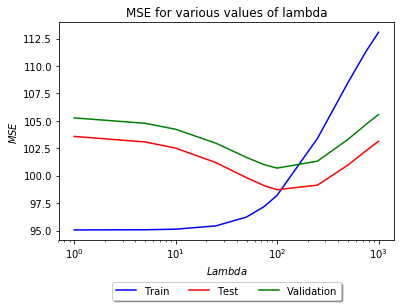

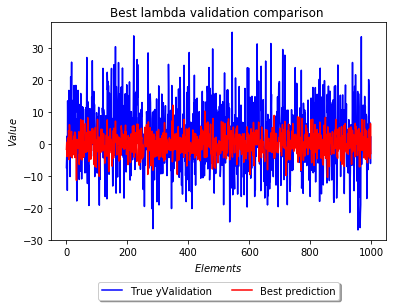

In [37]:
many_lambdas(xTest,xTrain,xValidation,yTest,yTrain,yValidation);

##### For (e), we have:

We will now use the datasets version of the weights with the ones in the first column.<br>

We repeat the experiment all over again for the new weights.

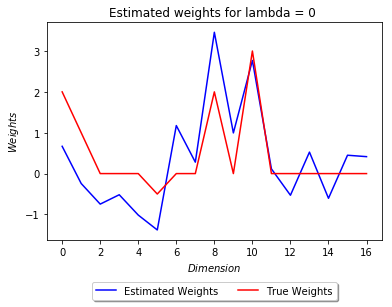

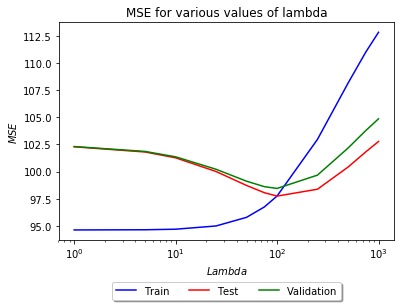

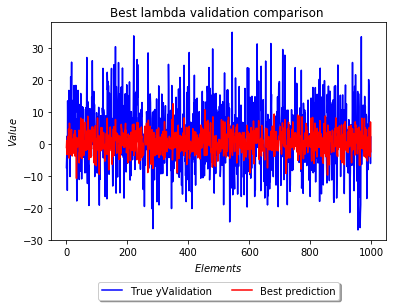

In [38]:
xTest = pd.read_csv('hw3xTest.csv',header=None)
xTrain = pd.read_csv('hw3xTrain.csv',header=None)
xValidation = pd.read_csv('hw3xValidation.csv',header=None)

lambda_0(xTest,xTrain,xValidation,yTest,yTrain,yValidation)
best_omega=many_lambdas(xTest,xTrain,xValidation,yTest,yTrain,yValidation) 

We see in the first two plots that the results are better.<br>

This means that the regression model became more flexible.

##### For (f), we have:

The biggest absolute weight value is the one that is the most important.<br>
Thus, the feature multiplied with that weight impacts the prediction result the most.<br>

For the lambda value that minimizes the MSE, we take the corresponding weights
The code below plots those weights compared to the ideal weights

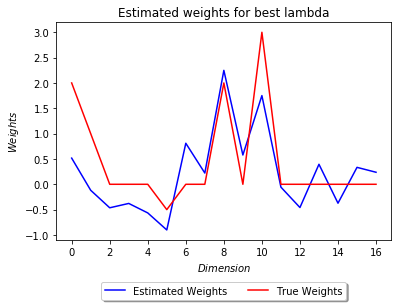

In [39]:
omega_true=np.array([2, 1,0,0,0,-0.5,0,0,2,0,3,0,0,0,0,0,0])

fig = plt.figure()
ax = plt.subplot(111)
ax.plot(best_omega, "b-",label =  'Estimated Weights')
ax.plot(omega_true, "r-",label='True Weights')
plt.xlabel(r'$Dimension$')
plt.ylabel(r'$Weights$')
plt.title(r'Estimated weights for best lambda')
ax.legend(loc='upper center',bbox_to_anchor=(0.5, -0.17),shadow=True, ncol=2)
plt.show()

In our case and based on the above plot, the 8th dimension is the most important